<a href="https://colab.research.google.com/github/MaximilianoScarlato/PROYECTO_4-_REDES/blob/feature%2Feda-redes/proyecto_4_Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Por favor, sube tu archivo Excel:


Saving REDES 2014.xls to REDES 2014.xls
⏳ Cargando archivo...

✅ Columnas vacías eliminadas

🔄 Columnas renombradas:
['region', 'distrito', 'localidad', 'punto_muestreo', 'domicilio_extracción', 'sitio_extrac', 'macrocuenca', 'microcuenca', 'entidad', 'causa_extraccion', 'proyecto', 'fecha_muestreo', 'fecha_de_pasaje_a_estadisticos', 'número_de_muestra', 'mes', 'descripción_tipo_de_industria', '', 'arsénico_µg/l', '', 'arsénico_total_µg/l', '', 'nitratos_no3__mg/l', '', 'tetracloruro_de_carbono_µg/l', '', 'tricloroetileno_µg/l']

🧹 Limpiando valores...

🎉 Estado FINAL del DataFrame:
• Filas: 2970 | Columnas: 26
• Muestra de datos (primeras 2 filas):
            region            distrito localidad punto_muestreo domicilio_extracción                    sitio_extrac macrocuenca microcuenca entidad causa_extraccion    proyecto      fecha_muestreo fecha_de_pasaje_a_estadisticos número_de_muestra             mes descripción_tipo_de_industria      arsénico_µg/l    arsénico_total_µg/l    nitr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


ANÁLISIS EXPLORATORIO DE DATOS (EDA)

📊 Información básica del dataset:
Total de registros: 2970
Total de columnas: 26

Columnas disponibles:
['region', 'distrito', 'localidad', 'punto_muestreo', 'domicilio_extracción', 'sitio_extrac', 'macrocuenca', 'microcuenca', 'entidad', 'causa_extraccion', 'proyecto', 'fecha_muestreo', 'fecha_de_pasaje_a_estadisticos', 'número_de_muestra', 'mes', 'descripción_tipo_de_industria', '', 'arsénico_µg/l', '', 'arsénico_total_µg/l', '', 'nitratos_no3__mg/l', '', 'tetracloruro_de_carbono_µg/l', '', 'tricloroetileno_µg/l']

📈 Estadísticas descriptivas:
                                 count  unique  \
region                            2970       6   
distrito                          2970      24   
localidad                         2969     114   
punto_muestreo                    2970     437   
domicilio_extracción              2970     699   
sitio_extrac                      2969       2   
macrocuenca                       2969       2   
microcuen

<ipython-input-2-c41d3176bc91>:149: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(df.describe(include='all').transpose())


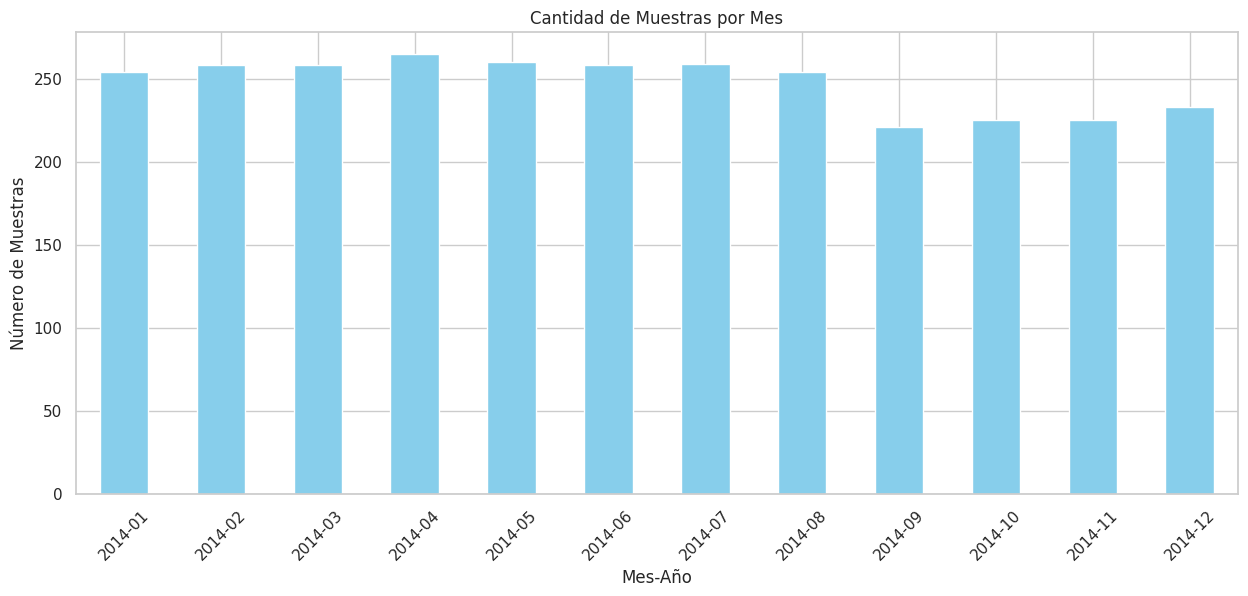


🎉 ¡Análisis completado con éxito!


In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Configuración inicial
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ---------------------------------------------------------------------------
# 1. Carga y limpieza inicial de datos
# ---------------------------------------------------------------------------
def cargar_y_limpiar_datos(ruta_archivo):
    """
    Carga el archivo Excel y realiza limpieza inicial:
    - Elimina filas/columnas vacías
    - Normaliza nombres de columnas
    - Maneja valores faltantes
    - Convierte tipos de datos
    """
    print("⏳ Cargando archivo...")
    df = pd.read_excel(ruta_archivo, header=None)

    # Eliminar la primera fila (vacía)
    df = df.iloc[1:, :].reset_index(drop=True)

    # Combinar las filas 2 y 3 para crear encabezados
    headers_row_2 = df.iloc[0, :].fillna("")  # Fila 2
    headers_row_3 = df.iloc[1, :].fillna("")  # Fila 3
    combined_headers = headers_row_2 + " " + headers_row_3
    combined_headers = combined_headers.str.strip().str.replace(" +", " ", regex=True)  # Limpiar espacios

    # Asignar los encabezados combinados
    df.columns = combined_headers
    df = df.iloc[2:, :].reset_index(drop=True)  # Eliminar las filas 2 y 3

    # Eliminar columnas completamente vacías
    df = df.dropna(axis=1, how='all')
    print("\n✅ Columnas vacías eliminadas")

    # Renombrar columnas
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_').str.replace('unnamed', 'columna_sin_nombre')
    print("\n🔄 Columnas renombradas:")
    print(df.columns.tolist())

    # -----------------------------------------------------------------------
    # Modificaciones solicitadas
    # -----------------------------------------------------------------------

    # 1. Agregar el símbolo '<' a las celdas vacías en columnas con '<' o '='
    columnas_simbolos = ['arsénico', 'arsénico_total', 'nitratos_no3_', 'tetracloruro_de_carbono', 'tricloroetileno']
    for col in columnas_simbolos:
        if col in df.columns:
            df[col] = df[col].fillna('<')  # Rellenar celdas vacías con '<'

    # 2. Pasar valores de la columna 'arsénico' a las celdas vacías de 'arsénico_total'
    if 'arsénico' in df.columns and 'arsénico_total' in df.columns:
        df['arsénico_total'] = df['arsénico_total'].combine_first(df['arsénico'])

    # 3. Eliminar la columna 'arsénico'
    if 'arsénico' in df.columns:
        df = df.drop(columns=['arsénico'])
        print("\n🗑️ Columna 'arsénico' eliminada")

    # -----------------------------------------------------------------------

    # Procesar valores numéricos
    print("\n🧹 Limpiando valores...")
    columnas_numericas = ['arsénico_total', 'nitratos_no3_', 'tetracloruro_de_carbono', 'tricloroetileno']
    for col in columnas_numericas:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace('=', '').str.replace(',', '.').str.strip()
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"• Columna {col}: Convertida a numérico | Valores nulos: {df[col].isna().sum()}")

    # Convertir fechas
    if 'fecha_muestreo' in df.columns:
        df['fecha_muestreo'] = pd.to_datetime(df['fecha_muestreo'], errors='coerce')

    # Eliminar filas completamente vacías
    df = df.dropna(how='all')

    print("\n🎉 Estado FINAL del DataFrame:")
    print(f"• Filas: {len(df)} | Columnas: {len(df.columns)}")
    print(f"• Muestra de datos (primeras 2 filas):")
    print(df.head(2).to_string())

    # Guardar archivo limpio temporal
    df.to_csv("datos_limpios_preview.csv", index=False)
    print("\n📁 Archivo temporal guardado: 'datos_limpios_preview.csv'")

    return df

# ---------------------------------------------------------------------------
# 2. Exportar datos limpios
# ---------------------------------------------------------------------------
def exportar_datos(df):
    """
    Exporta el DataFrame limpio a formatos XLSX y CSV.
    """
    try:
        output_xlsx_path = "archivo_limpio.xlsx"  # Ruta para el archivo .xlsx
        output_csv_path = "archivo_limpio.csv"  # Ruta para el archivo .csv

        # Guardar en formato Excel (.xlsx)
        df.to_excel(output_xlsx_path, index=False, engine="openpyxl")
        print(f"\n📁 Archivo limpio guardado en formato XLSX: {output_xlsx_path}")

        # Guardar en formato CSV
        df.to_csv(output_csv_path, index=False, encoding="utf-8-sig")
        print(f"📁 Archivo limpio guardado en formato CSV: {output_csv_path}")

    except Exception as e:
        print(f"❌ Error al exportar los datos: {e}")

    # Si estás en Google Colab, descarga los archivos
    try:
        from google.colab import files
        files.download(output_csv_path)
        files.download(output_xlsx_path)
    except ImportError:
        print("📂 No se detectó Google Colab. Los archivos se guardaron localmente.")

# ---------------------------------------------------------------------------
# 3. Análisis Exploratorio de Datos (EDA)
# ---------------------------------------------------------------------------
def realizar_eda(df):
    """
    Realiza análisis exploratorio de datos:
    - Estadísticas descriptivas
    - Conteo de valores faltantes
    - Distribución de variables
    - Correlaciones
    """
    print("\n" + "="*80)
    print("ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
    print("="*80 + "\n")

    print("📊 Información básica del dataset:")
    print(f"Total de registros: {len(df)}")
    print(f"Total de columnas: {len(df.columns)}")
    print("\nColumnas disponibles:")
    print(df.columns.tolist())

    print("\n📈 Estadísticas descriptivas:")
    print(df.describe(include='all').transpose())

    print("\n🔍 Valores faltantes por columna:")
    missing_data = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    missing_df = pd.concat([missing_data, missing_percent], axis=1, keys=['Total', 'Porcentaje'])
    print(missing_df[missing_df['Total'] > 0])

    num_cols = ['arsénico_total', 'nitratos_no3_', 'tetracloruro_de_carbono', 'tricloroetileno']
    num_cols = [col for col in num_cols if col in df.columns]

    if num_cols:
        print("\n📊 Distribución de variables numéricas:")
        df[num_cols].hist(bins=20, figsize=(15, 10))
        plt.suptitle('Distribución de Variables Numéricas')
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(15, 6))
        df[num_cols].boxplot()
        plt.title('Boxplot de Variables Numéricas (Escala Original)')
        plt.xticks(rotation=45)
        plt.show()

# ---------------------------------------------------------------------------
# 4. Visualización de datos
# ---------------------------------------------------------------------------
def visualizar_datos(df):
    """
    Crea visualizaciones para explorar los datos:
    - Series temporales
    - Distribuciones geográficas
    - Comparaciones entre regiones
    """
    print("\n" + "="*80)
    print("VISUALIZACIÓN DE DATOS")
    print("="*80 + "\n")

    if 'fecha_muestreo' in df.columns:
        df['año_mes'] = df['fecha_muestreo'].dt.to_period('M')
        conteo_muestras = df['año_mes'].value_counts().sort_index()

        plt.figure(figsize=(15, 6))
        conteo_muestras.plot(kind='bar', color='skyblue')
        plt.title('Cantidad de Muestras por Mes')
        plt.xlabel('Mes-Año')
        plt.ylabel('Número de Muestras')
        plt.xticks(rotation=45)
        plt.show()

    if 'region' in df.columns:
        num_cols = ['arsénico_total', 'nitratos_no3_', 'tetracloruro_de_carbono', 'tricloroetileno']
        num_cols = [col for col in num_cols if col in df.columns]

        for col in num_cols:
            plt.figure(figsize=(12, 6))
            sns.barplot(x='region', y=col, data=df, estimator=np.mean, ci=None)
            plt.title(f'Concentración Promedio de {col} por Región')
            plt.xticks(rotation=45)
            plt.show()

# ---------------------------------------------------------------------------
# 5. Función principal
# ---------------------------------------------------------------------------
def main():
    """
    Función principal que ejecuta el flujo completo:
    1. Carga y limpieza de datos
    2. Exportación de datos limpios
    3. Análisis exploratorio
    4. Visualización de datos
    """
    from google.colab import files

    # Subir archivo
    print("📂 Por favor, sube tu archivo Excel:")
    uploaded = files.upload()
    ruta_archivo = list(uploaded.keys())[0]

    # 1. Cargar y limpiar datos
    df = cargar_y_limpiar_datos(ruta_archivo)

    # 2. Exportar datos limpios
    exportar_datos(df)

    # 3. Análisis exploratorio
    realizar_eda(df)

    # 4. Visualización de datos
    visualizar_datos(df)

    print("\n🎉 ¡Análisis completado con éxito!")

# Ejecutar función principal
if __name__ == "__main__":
    main()